### Trying out linear regression on a small dataset in three methods
+ Gradient descent algorithm
+ Polynomial regression
+ sklearn library

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

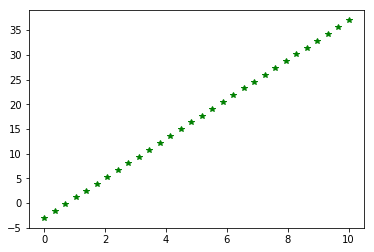

In [2]:
# Take the equation of a line and try to reproduce the coefficents using algorithms
x=np.linspace(0,10,30)
t0=-3 ## c --> intercept
t1=4 ## m --> slope
y= t0 +t1*x

## Now we have to see if our algorithms can reproduce values close to t0 and t1
plt.plot(x,y,'g*')

### Splitting the data into train and test (optional for this part)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [4]:
## some neccesary modifications to make the same data work with SK learn
X_train=np.asarray(X_train)
y_train=np.asarray(y_train)
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)

### Gradient descent algorithm

In [5]:
temp_0=0
temp_1=0
t0=0
t1=0
m=len(X_train)
h_x= t0 + t1*X_train
alpha=0.01
precision = 0.0001
#ideal alpha=0.001
# ideal precison=0.01
ite=50000
T0=[]
T1=[]
J=[]

for i in range(ite):
    t0=temp_0
    t1=temp_1
    temp_0 = t0 - sum(alpha* (1/m)* (((t0 + t1*X_train - y_train))))
    temp_1 = t1 - sum(alpha* (1/m)* (((t0 + t1*X_train - y_train)*X_train)))
    T0.append(t0)
    T1.append(t1)
    if abs(t0 - temp_0) <= precision:
        #print('i',i)
        #print(t0,t1)
        break
    J.append((1/(2*m))*(sum((t0 + t1*X_train - y_train)**2)))
    #print(t0,t1)
print('iteration to match precision',i)
print('The best value for T0 is {} and T1 is {}'.format(t0,t1))

iteration to match precision 1672
The best value for T0 is [-2.96339299] and T1 is [3.99432486]


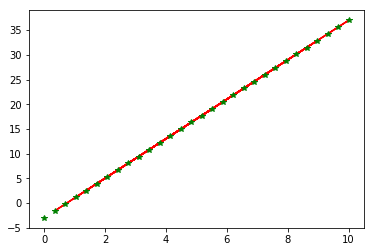

In [6]:
plt.plot(X_train,t0 + t1*X_train,'r-')
plt.plot(x,y,'g*')

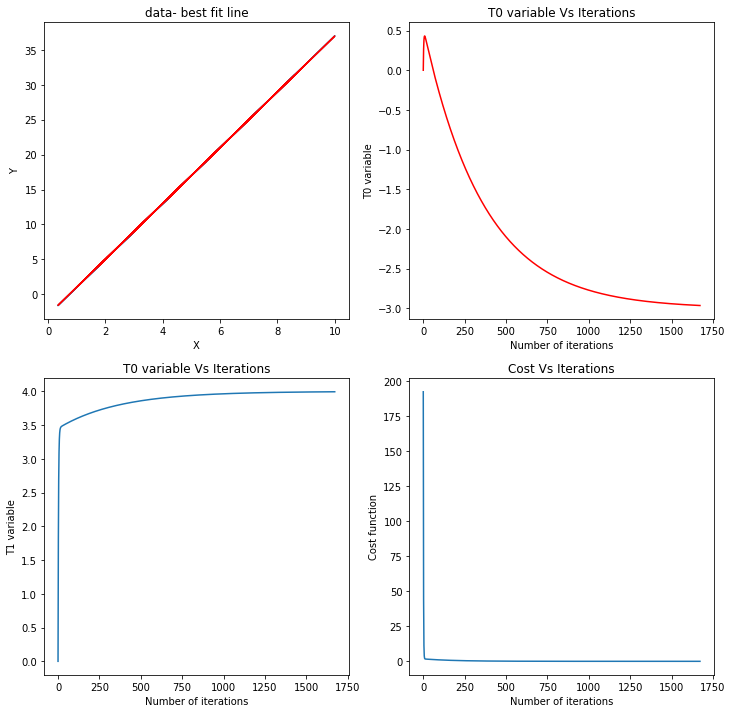

In [7]:
fig=plt.figure(figsize=(12,12))

####################
plt.subplot(2,2,1)
plt.title('data- best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X_train,y_train)
plt.plot(X_train,t0 +t1*X_train,'-r')

####################
plt.subplot(2,2,2)
plt.title('T0 variable Vs Iterations')
plt.xlabel('Number of iterations')
plt.ylabel('T0 variable')
plt.plot(range(i+1),T0,'r-')

####################
plt.subplot(2,2,3)
plt.title('T0 variable Vs Iterations')
plt.xlabel('Number of iterations')
plt.ylabel('T1 variable')
plt.plot(range(i+1),T1)

####################
plt.subplot(2,2,4)
plt.title('Cost Vs Iterations')
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.plot(range(i),J)

In [8]:
### Polynomial regression

In [9]:
I=np.asarray([1]*len(X_train))
I=I.reshape(-1,1)
X_train.shape,I.shape

((20, 1), (20, 1))

In [10]:
X_vector=np.hstack((X_train,I))
theta=np.dot(np.dot(np.linalg.inv(np.dot(X_vector.transpose(),X_vector)),X_vector.transpose()),y_train)
theta

array([[ 4.],
       [-3.]])

### Libraries using sklearn

In [11]:
## libraries from sklearn
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression().fit(X_train,y_train)
model.coef_,model.intercept_

(array([[4.]]), array([-3.]))